# Logistic Regression

## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [27]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('../data/US-pumpkins.csv')

full_pumpkins.head()




,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [28]:
#Tidying the data
columns_to_select = ["City Name", 'Package', 'Variety', 'Origin', 'Item Size', 'Color']
pumpkins = full_pumpkins[columns_to_select].copy()
pumpkins.dropna(inplace=True)

In [29]:
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 2 to 1698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City Name  991 non-null    object
 1   Package    991 non-null    object
 2   Variety    991 non-null    object
 3   Origin     991 non-null    object
 4   Item Size  991 non-null    object
 5   Color      991 non-null    object
dtypes: object(6)
memory usage: 54.2+ KB


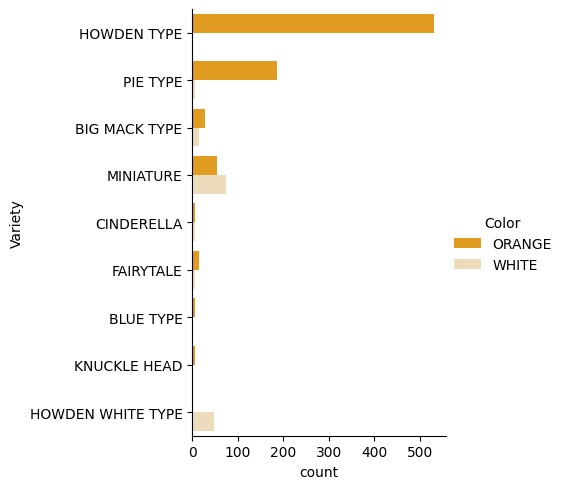

In [30]:
import seaborn as sns

pallete = {
    'ORANGE': 'orange',
    'WHITE': 'wheat'
}
sns.catplot(
    data=pumpkins,
    y='Variety',
    hue='Color',
    kind='count',
    palette=pallete
)

We can see from the plot that there are a lot of orange colored pumpkins in the dataset, and white color, not that much.

## Data pre-processing: feature and label encoding
Our pumpkins dataset contains string values for all its columns. Working with categorical data is intuitive for humans but not for machines. Machine learning algorithms work well with numbers. That's why encoding is a very important step in the data pre-processing phase, since it enables us to turn categorical data into numerical data, without losing any information. Good encoding leads to building a good model.

### Ordinal Encoder

In [31]:
from sklearn.preprocessing import OrdinalEncoder

item_size_categories = pumpkins['Item Size'].unique()
ordinal_features = ['Item Size']

ord_encoder = OrdinalEncoder(categories=[item_size_categories])


In [32]:
### Categorical Encoder
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['City Name','Package', 'Variety', 'Origin']

cat_encoder = OneHotEncoder(sparse_output=False)

In [33]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[
    ('ord', ord_encoder, ordinal_features),
    ('cat', cat_encoder, categorical_features)
])
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkins)

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins['Color'])

In [35]:
encoded_pumpkins = encoded_features.assign(Color=encoded_label)

In [40]:
encoded_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 2 to 1698
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ord__Item Size                     991 non-null    float64
 1   cat__City Name_ATLANTA             991 non-null    float64
 2   cat__City Name_BALTIMORE           991 non-null    float64
 3   cat__City Name_BOSTON              991 non-null    float64
 4   cat__City Name_CHICAGO             991 non-null    float64
 5   cat__City Name_COLUMBIA            991 non-null    float64
 6   cat__City Name_DALLAS              991 non-null    float64
 7   cat__City Name_DETROIT             991 non-null    float64
 8   cat__City Name_LOS ANGELES         991 non-null    float64
 9   cat__City Name_MIAMI               991 non-null    float64
 10  cat__City Name_NEW YORK            991 non-null    float64
 11  cat__City Name_PHILADELPHIA        991 non-null    float64
 12

/tmp/ipykernel_22477/2606494930.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


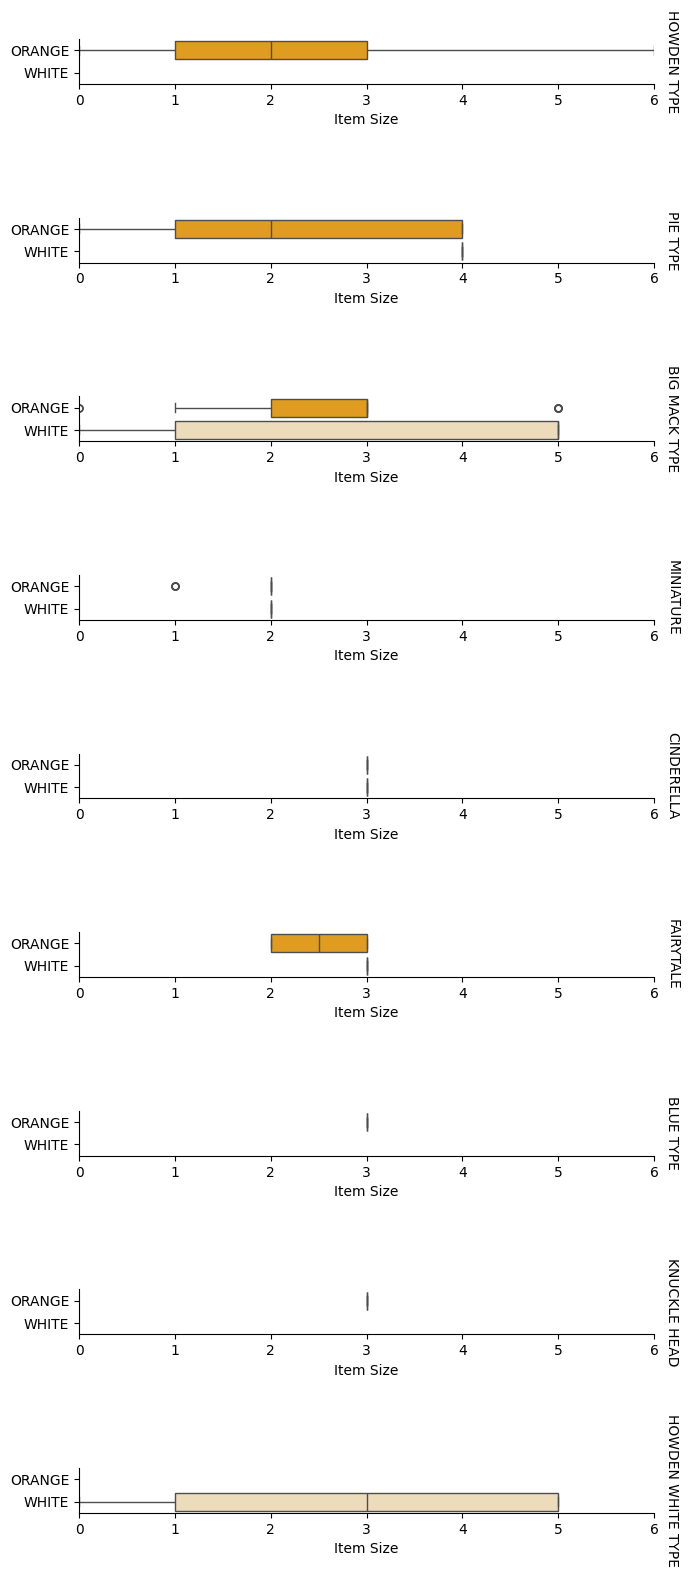

In [37]:
palette = {
'ORANGE': 'orange',
'WHITE': 'wheat',
}
pumpkins['Item Size'] = encoded_pumpkins['ord__Item Size']
g = sns.catplot(
    data=pumpkins,
    x="Item Size", y="Color", row='Variety',
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.8, aspect=4, palette=palette,
)
g.set(xlabel="Item Size", ylabel="").set(xlim=(0,6))
g.set_titles(row_template="{row_name}")

/tmp/ipykernel_22477/165412901.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Color", y="ord__Item Size", data=encoded_pumpkins, palette=palette)
/home/jacob/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jacob/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='ord__Item Size'>

/home/jacob/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jacob/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


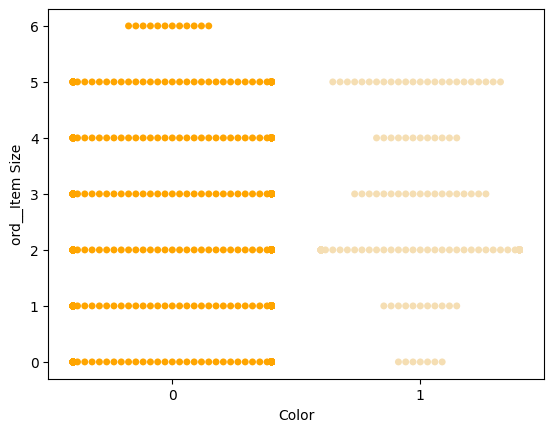

In [39]:
palette = {
'0': 'orange',
'1': 'wheat'
}
sns.swarmplot(x="Color", y="ord__Item Size", data=encoded_pumpkins, palette=palette)

In [45]:
### Building the model
from sklearn.model_selection import train_test_split

X = encoded_pumpkins[encoded_pumpkins.columns.difference(['Color'])]
y = encoded_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
from sklearn.metrics import f1_score,classification_report

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


print("Predicted labels: ", y_pred)
print("Accuracy: ", clf.score(X_test, y_test))
print("f1 score: ", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       270
           1       0.83      0.60      0.70        58

    accuracy                           0.91       328
   macro avg       0.88      0.79      0.82       328
weighted avg       0.90      0.91      0.90       328

Predicted labels:  [0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0

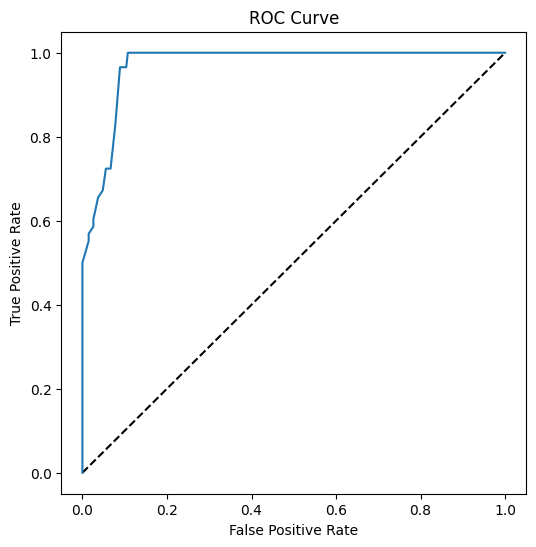

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [49]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.9709131545338442
